<a href="https://colab.research.google.com/github/lorcan2440/Computing-Exercises/blob/main/Copy_of_11_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the modules that will be used.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

1. Dot product: $ O(n) $
2. Matrix vector product: $ O(n^2) $
3. Matrix matrix product: $ O(n^3) $

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [23]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

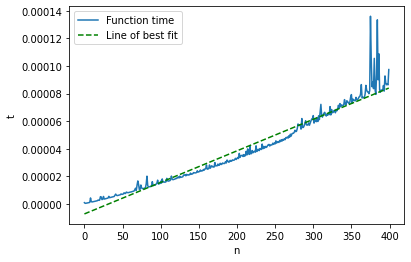

In [37]:
from timeit import default_timer as timer
import numpy as np

trial_values = [n for n in range(400)]
times = []
for n in trial_values:
  times_unit = []
  for trial in range(10):
    start = timer()
    y = factorial(n)
    times_unit.append(timer() - start)
  times.append(sum(times_unit)/len(times_unit))

m, b = np.polyfit(trial_values, times, 1)
m, b = float(m), float(b)

plt.plot(trial_values, times)
plt.plot(trial_values, m*np.array(trial_values) + b, color = 'green', linestyle = 'dashed')
plt.legend(["Function time", "Line of best fit"])
plt.xlabel('n')
plt.ylabel('t')
plt.show()

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [38]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [39]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [54]:
from timeit import default_timer as timer
import numpy as np

trial_values = 2**np.arange(2, 12)
times = []
for n in trial_values:
  M = np.random.rand(n, n)
  times_unit = []
  for trial in range(10):
    start = timer()
    y = np.linalg.slogdet(M)
    times_unit.append(timer() - start)
  times.append(sum(times_unit)/len(times_unit))

Plot result:

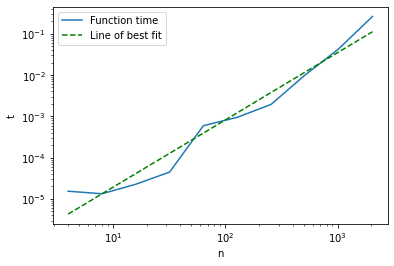

Appears to curve upwards even on a log-log plot, implying faster than polynomial growth rate.
Could be O(2^n), O(n!) etc.


In [55]:
m, b = np.polyfit(np.log(trial_values), np.log(times), 1)
m, b = float(m), float(b)

plt.loglog(trial_values, np.array(times))
plt.plot(trial_values, np.exp(np.poly1d(np.polyfit(np.log(trial_values), np.log(times), 1))(np.log(trial_values))),
         color = 'green', linestyle = 'dashed')
plt.legend(["Function time", "Line of best fit"])
plt.xlabel('n')
plt.ylabel('t')
plt.show()

print('Appears to curve upwards even on a log-log plot, implying faster than polynomial growth rate.')
print('Could be O(2^n), O(n!) etc.')